In [1]:
import sys
import importlib  

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append("../")
sys.path.append("../LOCOinPython/")

In [3]:
from utils import ring_to_madx

In [4]:
from LOCOinPython.file_loader.structure_loader import read_structure
ut = importlib.import_module("SKIF-Lattice-Analysis.utils")

# Converter

In [5]:
# seq = ring_to_madx("D:/Work/K500/Regime+e-/RING/PODEMAXR.rin")

# Structure loading

In [6]:
file = "structures/k500.seq"
structure = read_structure(file, energy=0.53)

Structure in the JSON format already exists


# Ideal structure

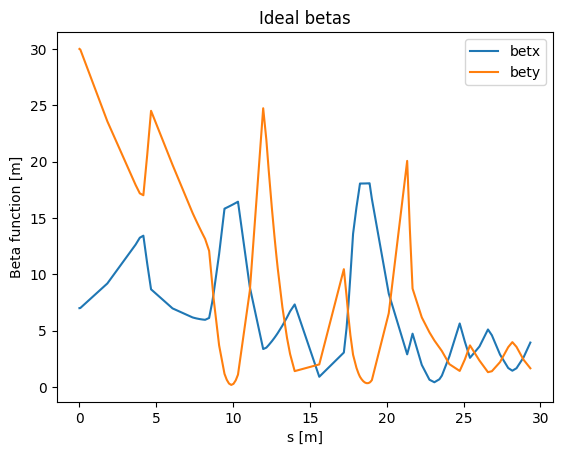

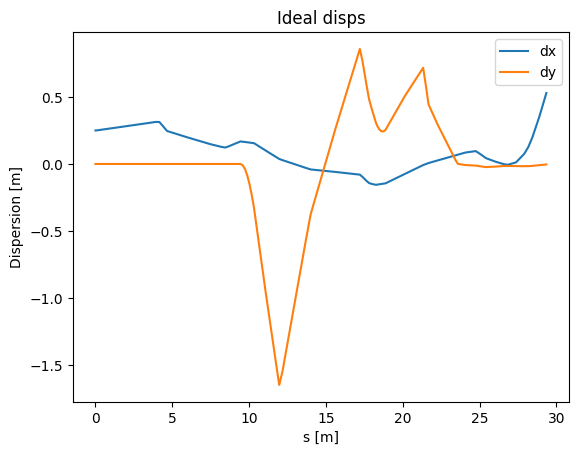

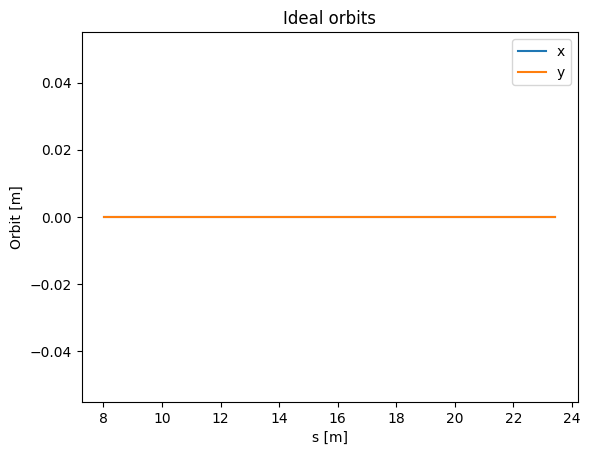

In [7]:
init_optics = ut.get_optics(structure, initial_twiss={"betx": 7, "bety": 30, "dx": 0.25})
ut.plot_optics(init_optics, params_to_show="beta_all", title="Ideal betas")
plt.show()

ut.plot_optics(init_optics, params_to_show="disp_all", title="Ideal disps")
plt.show()

ut.plot_optics(init_optics, params_to_show="orbit", title="Ideal orbits")
plt.show()

In [115]:
from epics import caget

In [158]:
print(caget("CHAN:DT11:Xe-I"))
print(caget("CHAN:K500:posE_skip-I"))
print(caget("CHAN:K500:Xe_skip-I"))

0.0
[]
[]


In [157]:
print("TbT X", caget("VEPP3:4P5:Xext-I"))
print("TbT I", caget("VEPP3:4P5:Iext-I"))
print("TbT X Fast", caget("VEPP3:1P7:Xfast-I"))
print("CO X ?", caget("VEPP3:1P7:X-I"))
print("CO X ?", caget("VEPP3:1P7:Xlast-I"))
print("CO X ?", caget("VEPP3:1P7:SW0X-I"))
print("CO X ?", caget("VEPP3:1P7:SW1X-I"))
print("CO X ?", caget("VEPP3:1P7:SW2X-I"))
print("CO X ?", caget("VEPP3:1P7:SW3X-I"))

TbT X [ 4.1009364  0.5984252 -0.6708118 ... -7.2336655 -3.9469435 -3.6352327]
TbT I [0.13310003 0.10297313 0.1640391  ... 0.09955651 0.09974957 0.15498489]
TbT X Fast []
CO X ? -5.059041976928711
CO X ? -5.058284759521484
CO X ? -4.981046676635742
CO X ? -5.108304977416992
CO X ? -5.009918689727783
CO X ? -5.133869171142578
